In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

### DATA LOADING and Column overview

In [9]:
file_path = r"/Users/sanketnagshetti/Desktop/AI/Machine Learning Programming - 01/Project/DSS2.csv"
data = pd.read_csv(file_path)
data.head()

,SampleID,CHROM,REF,ALT,Consequence,IMPACT,SYMBOL,FILTER,BIOTYPE,VARIANT_CLASS,...,MFRL,MMQ,Sample.AD,Sample.F1R2,Sample.F2R1,DP,GERMQ,MPOS,POPAF,Sample.DP
0,ERR035487,chr1,G,A,missense_variant,MODERATE,MIB2,PASS,protein_coding,SNV,...,195.196,60.60,9.60,3.40,6.20,15.0,23.0,17.0,7.30,15.0
1,ERR035487,chr1,G,T,missense_variant,MODERATE,CCDC27,PASS,protein_coding,SNV,...,118.122,60.60,39.18,20.80,18.10,57.0,33.0,24.0,7.30,57.0
2,ERR035487,chr1,G,A,missense_variant,MODERATE,PIK3CD,PASS,protein_coding,SNV,...,151.103,60.60,14.17,11.70,3.10,32.0,24.0,22.0,7.30,31.0
3,ERR035487,chr1,CA,TG,missense_variant,MODERATE,PRAMEF17,PASS,protein_coding,substitution,...,165.117,60.47,293.39,157.24,130.13,363.0,93.0,15.0,7.30,332.0
4,ERR035487,chr1,C,T,missense_variant,MODERATE,PRDM2,PASS,protein_coding,SNV,...,0.159,60.60,0.25,0.12,0.13,25.0,27.0,12.0,3.02,25.0


<BarContainer object of 5 artists>

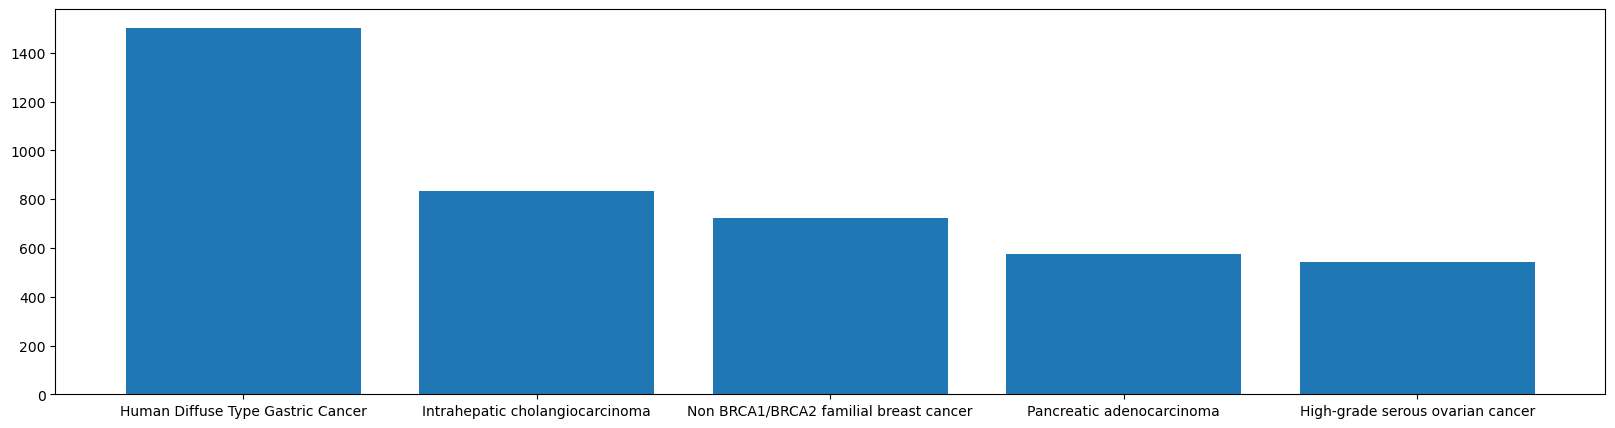

In [10]:
a = data['cancer'].value_counts().to_dict()
a1 = pd.DataFrame.from_dict(a,orient ='index')
aa = a1.reset_index()
a = aa.rename(columns = {'index':'cancer',0:'count'})
x = a['cancer']
y = a['count']
plt.subplots(figsize=(20, 5))
plt.bar(x,y)

### Above Graph represent the target present in the dataset and it represent the  **Human Diffuse type gastric Cancer** class imbalance with other class 

### From dataset we have only taken *REF,ALT,SYMBOL,CONSEQUENCE,VARIANT_CLASS* assuming that our target class(cancer type) dependend on these datasets



In [12]:
data1= data[['REF','ALT','SYMBOL','Consequence','VARIANT_CLASS','cancer']]
data1.head()

,REF,ALT,SYMBOL,Consequence,VARIANT_CLASS,cancer
0,G,A,MIB2,missense_variant,SNV,High-grade serous ovarian cancer
1,G,T,CCDC27,missense_variant,SNV,High-grade serous ovarian cancer
2,G,A,PIK3CD,missense_variant,SNV,High-grade serous ovarian cancer
3,CA,TG,PRAMEF17,missense_variant,substitution,High-grade serous ovarian cancer
4,C,T,PRDM2,missense_variant,SNV,High-grade serous ovarian cancer


## DATA LABELING using SKLEARN PREPROCESSING LABELENCODER

In [13]:
# importing the libraries 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:

data11 = data1[['REF','ALT','SYMBOL','Consequence','VARIANT_CLASS']].values
for i in range(len(data11[0])):
    data11[:,i] = le.fit_transform(data11[:,i])
    
pd_data11 = pd.DataFrame(data11)
dd = pd_data11.rename(columns = {0:'REF',1:'ALT',2:'SYMBOL',3:'Consequence',4:'VARIANT_CLASS'})
dd.head()

,REF,ALT,SYMBOL,Consequence,VARIANT_CLASS
0,34,0,1467,5,0
1,34,23,387,5,0
2,34,0,1883,5,0
3,17,28,1976,5,3
4,16,23,1982,5,0


In [15]:
X = dd.copy()
y = data1[['cancer']]

In [16]:
X.isna().sum()

REF              0
ALT              0
SYMBOL           0
Consequence      0
VARIANT_CLASS    0
dtype: int64

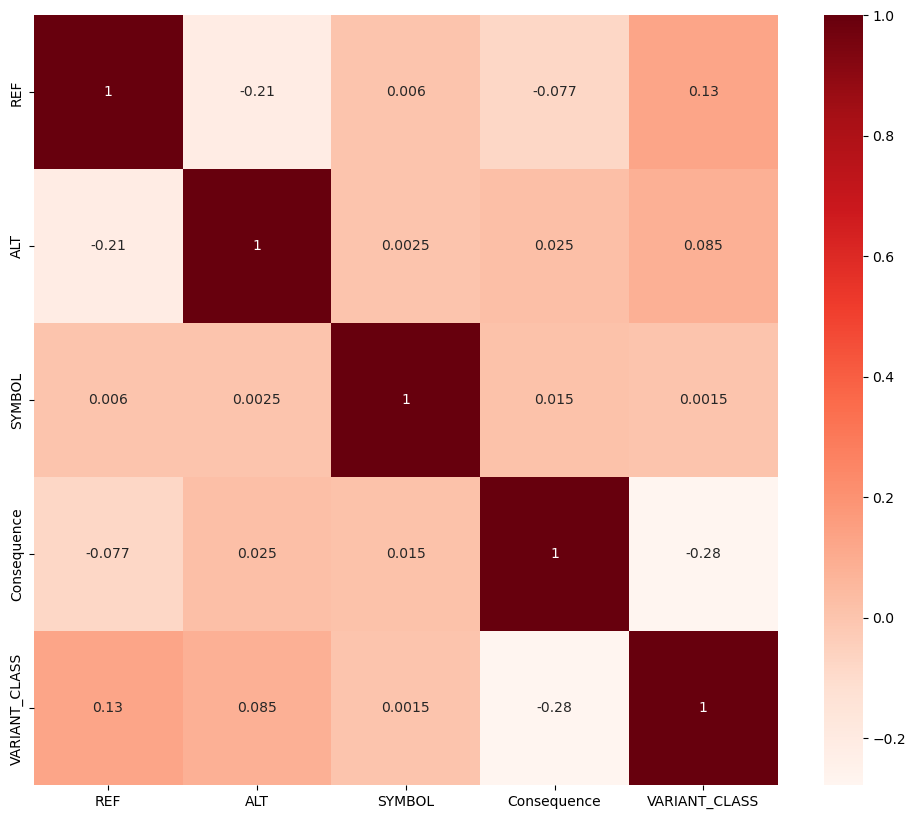

In [17]:
## correlation
X = X.astype('int')
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Above one is correlation heat map between selected feature as we see in the map between each feature their is less 0.1 relation and lets go through some more graphical reprsentation using **piraplot**

In [ ]:
#  sns.pairplot(X)

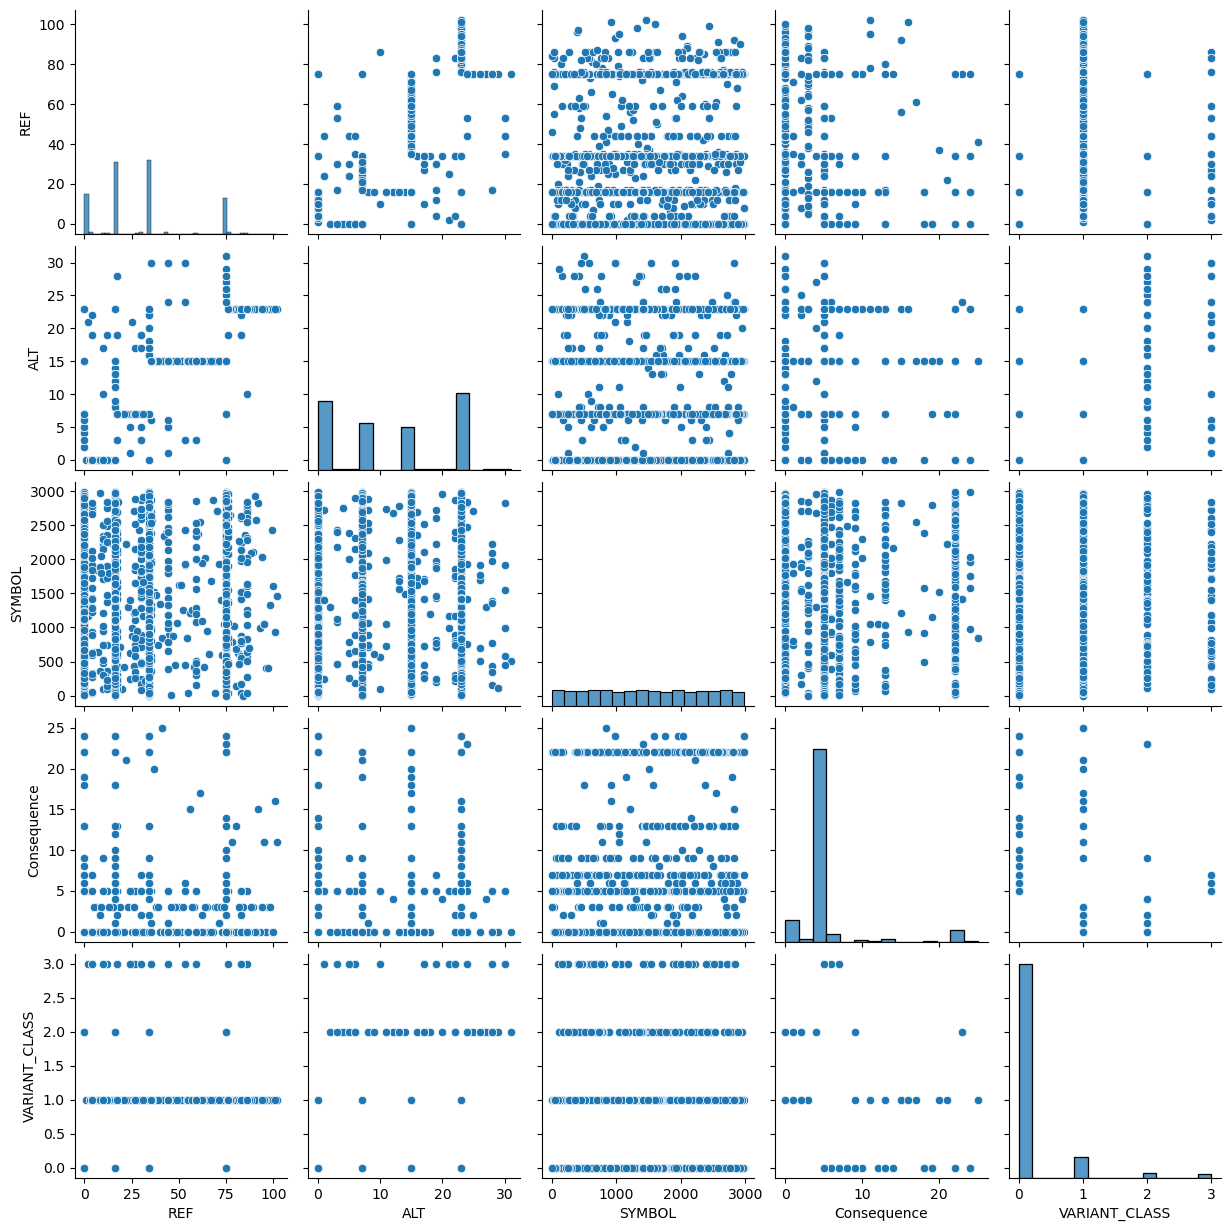

In [18]:
fig = sns.pairplot(X)
fig.savefig("pair plot.svg")

## pattering using train_test_split method

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
x_train.shape,y_train.shape

((3135, 5), (3135, 1))

## **KNN model** : 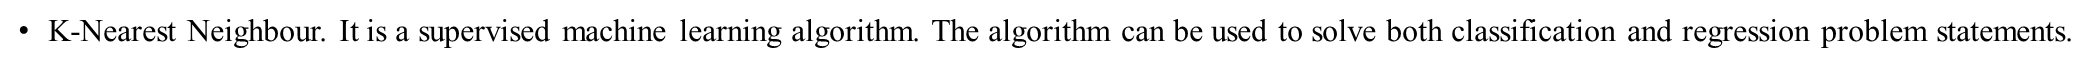
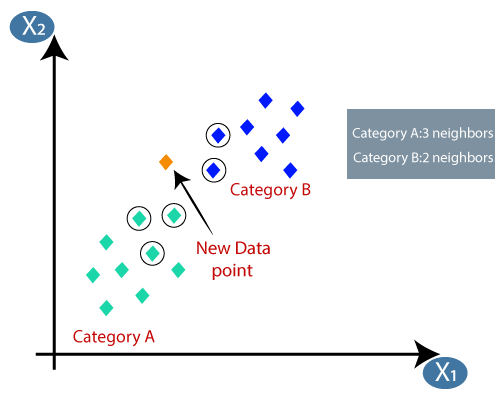


In [20]:
## KNN 
Classify1 = KNeighborsClassifier(n_neighbors = 1)
Classify1.fit(x_train,y_train)

/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

## **SVM** : 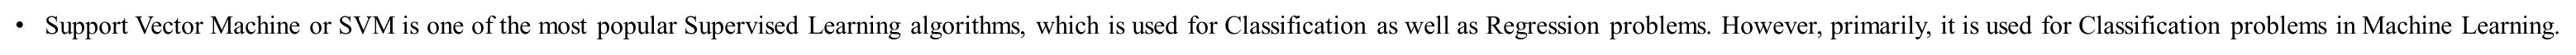
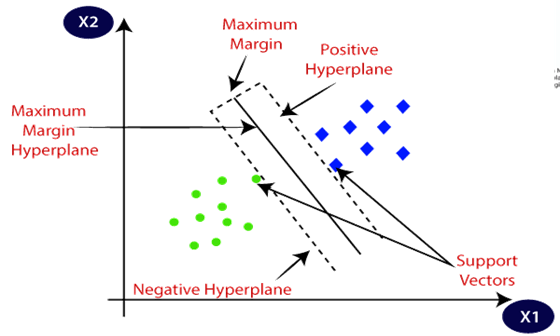

In [21]:
## SVM
classify2 = SVC()
classify2.fit(x_train,y_train)

/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

## **Naive Bayes Model** 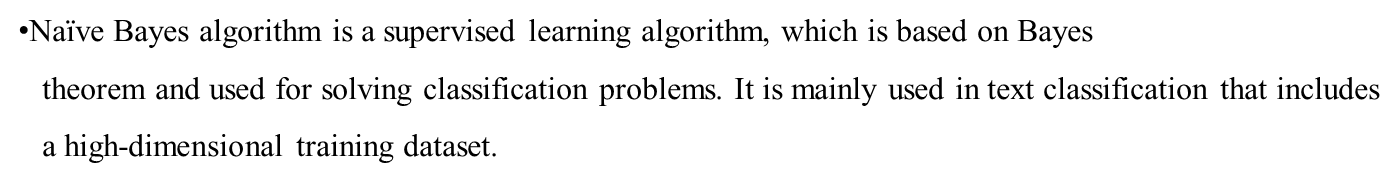
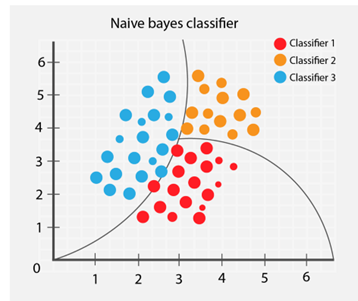

In [22]:
## Naive Bayes model
classify3 = GaussianNB()
classify3.fit(x_train,y_train)

/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

##**RandomForestClassifier** : 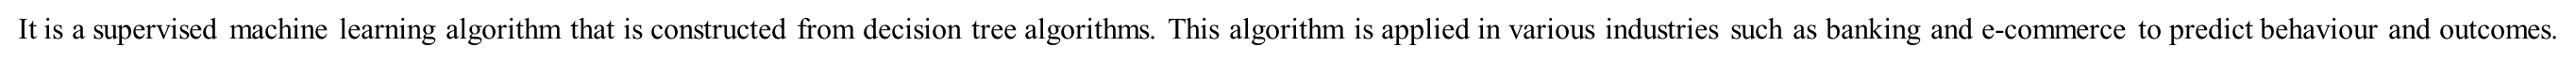
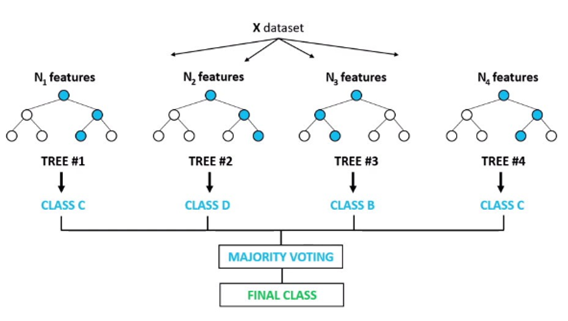

In [23]:
 ## Randomforest
 classify4 = RandomForestClassifier(n_estimators = 100)
 classify4.fit(x_train,y_train)

/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [24]:
##decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

##CLASSIFICATION REPORT FOR ALL TRAINED MODEL

In [25]:
## KNN
y_pred1 = Classify1.predict(x_test)
print(classification_report(y_test, y_pred1))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.41      0.53      0.46       131
     Human Diffuse Type Gastric Cancer       0.46      0.41      0.43       373
       Intrahepatic cholangiocarcinoma       0.28      0.25      0.26       213
Non BRCA1/BRCA2 familial breast cancer       0.29      0.28      0.29       182
             Pancreatic adenocarcinoma       0.68      0.80      0.74       147

                              accuracy                           0.43      1046
                             macro avg       0.42      0.45      0.44      1046
                          weighted avg       0.42      0.43      0.42      1046



In [26]:
## SVM
y_pred2 = classify2.predict(x_test)
print(classification_report(y_test, y_pred2))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.00      0.00      0.00       131
     Human Diffuse Type Gastric Cancer       0.36      1.00      0.53       373
       Intrahepatic cholangiocarcinoma       0.00      0.00      0.00       213
Non BRCA1/BRCA2 familial breast cancer       0.00      0.00      0.00       182
             Pancreatic adenocarcinoma       0.00      0.00      0.00       147

                              accuracy                           0.36      1046
                             macro avg       0.07      0.20      0.11      1046
                          weighted avg       0.13      0.36      0.19      1046



/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [27]:
## Naive Bayes
y_pred3 = classify3.predict(x_test)
print(classification_report(y_test, y_pred3))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.00      0.00      0.00       131
     Human Diffuse Type Gastric Cancer       0.37      0.96      0.53       373
       Intrahepatic cholangiocarcinoma       0.25      0.01      0.02       213
Non BRCA1/BRCA2 familial breast cancer       0.33      0.11      0.16       182
             Pancreatic adenocarcinoma       0.00      0.00      0.00       147

                              accuracy                           0.36      1046
                             macro avg       0.19      0.22      0.14      1046
                          weighted avg       0.24      0.36      0.22      1046



/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanketnagshetti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [28]:
## RandomForest
y_pred4 = classify4.predict(x_test)
print(classification_report(y_test, y_pred4))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.41      0.53      0.46       131
     Human Diffuse Type Gastric Cancer       0.48      0.49      0.48       373
       Intrahepatic cholangiocarcinoma       0.33      0.26      0.29       213
Non BRCA1/BRCA2 familial breast cancer       0.39      0.34      0.36       182
             Pancreatic adenocarcinoma       0.66      0.80      0.72       147

                              accuracy                           0.46      1046
                             macro avg       0.45      0.48      0.46      1046
                          weighted avg       0.45      0.46      0.45      1046



In [29]:
#Decision Tree
y_pred5 = clf.predict(x_test)
print(classification_report(y_test,y_pred5))

                                        precision    recall  f1-score   support

      High-grade serous ovarian cancer       0.40      0.54      0.46       131
     Human Diffuse Type Gastric Cancer       0.48      0.46      0.47       373
       Intrahepatic cholangiocarcinoma       0.32      0.27      0.29       213
Non BRCA1/BRCA2 familial breast cancer       0.38      0.32      0.35       182
             Pancreatic adenocarcinoma       0.65      0.78      0.71       147

                              accuracy                           0.45      1046
                             macro avg       0.45      0.48      0.46      1046
                          weighted avg       0.45      0.45      0.45      1046

